# **Data Visualization**

# Objectives
Explore and visualize restaurant data across 31 European cities to uncover patterns and insights related to cuisine, ratings, rankings, pricing, and customer engagement. Through interactive visualizations and descriptive analysis, we aim to:

- Understand the distribution and popularity of different cuisine styles across cities.

- Analyze the relationship between restaurant rankings, ratings, and number of reviews.

- Examine how price ranges correlate with ratings and cuisine and city.

These insights can be useful for tourists, restaurant owners, and analysts seeking to better understand the European restaurant landscape.

# Input
* The input can be found [here](../data_set/processed/TA_restaurants_cleaned.csv)
* This is a csv file contained the cleaned data outputted by the ETL process.

# Outputs

- All the visualizations have been saved as PNG files and are stored in a designated folder for easy access and reference, which can be found [here](../Images).

---

# Change working directory
Change the working directory from its current folder to its parent folder as the notebooks will be stored in a subfolder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\euro-dine-insights\\jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\euro-dine-insights'

Changing path directory to the dataset

In [4]:
#path directory
raw_data_dir = os.path.join(current_dir, 'data_set/raw') 

#path directory
processed_data_dir = os.path.join(current_dir, 'data_set/processed') 


---

# Import packages

In [5]:
import pandas as pd # Import pandas
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn
import plotly.express as px # Import plotly
sns.set_style('whitegrid') # Set style for visuals

---

# Load the cleaned dataset

In [6]:
#load the cleaned dataset
df = pd.read_csv(os.path.join(processed_data_dir, 'TA_restaurants_cleaned.csv'))

#display first 5 rows of data
df.head() 

,Name,City,Cuisine,Ranking,Rating,Price_Range,Number_of_Reviews,Cuisine_Counts,Country_Name
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136,3,Netherlands
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812,4,Netherlands
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567,6,Netherlands
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564,7,Netherlands
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316,6,Netherlands


---

# Price Perception
Investigates whether restaurants with higher prices are more likely to achieve better ratings. The analysis will use two key variables: Price Range (grouped into low, medium, and high) and Rating (grouped into Excellent, Average, Poor).

In [7]:
#copy the dataframe to avoid any changes to the original dataframe
df_price = df.copy()

In [8]:
#how many restaurants are in each price range
df_price['Price_Range'].value_counts()

Price_Range
$$ - $$$    52507
$           17639
$$$$         4075
Name: count, dtype: int64

Key Observations:

- The dataset is highly imbalanced across price categories, most restaurants fall into the medium price range around (68%), followed by low priced around (23%), while high priced restaurants are a small minority around (5%).

- Comparing raw counts may bias the results toward medium priced restaurants.

- To gain deeper insights, it will be important to examine the rating distribution within each price range.

In [9]:
#check the categories in the Price_Range column
df_price['Price_Range'].unique()

array(['$$ - $$$', '$$$$', '$'], dtype=object)

In [10]:
#change the Price_Range column into three simplified categories: $$$$ to High, $$ - $$$ to Medium, $ to Low
df_price['Price_Range'] = df_price['Price_Range'].replace({'$$$$': 'High', '$$ - $$$': 'Medium', '$': 'Low'})
#display the first row to confirm changes
df_price.head(1)

,Name,City,Cuisine,Ranking,Rating,Price_Range,Number_of_Reviews,Cuisine_Counts,Country_Name
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,Medium,136,3,Netherlands


In [11]:
#change the Rating column into three simplified categories: Excellent (4-5), Average (3.0–3.9), Poor (1-2.9)
def categorize_rating(rating):
    if rating >= 4.0:
        return 'Excellent'
    elif 3.0 <= rating < 4.0:
        return 'Average'
    else:
        return 'Poor'  
df_price['Rating_Category'] = df_price['Rating'].apply(categorize_rating)
#display the first row to confirm changes
df_price.head(1)

,Name,City,Cuisine,Ranking,Rating,Price_Range,Number_of_Reviews,Cuisine_Counts,Country_Name,Rating_Category
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,Medium,136,3,Netherlands,Excellent


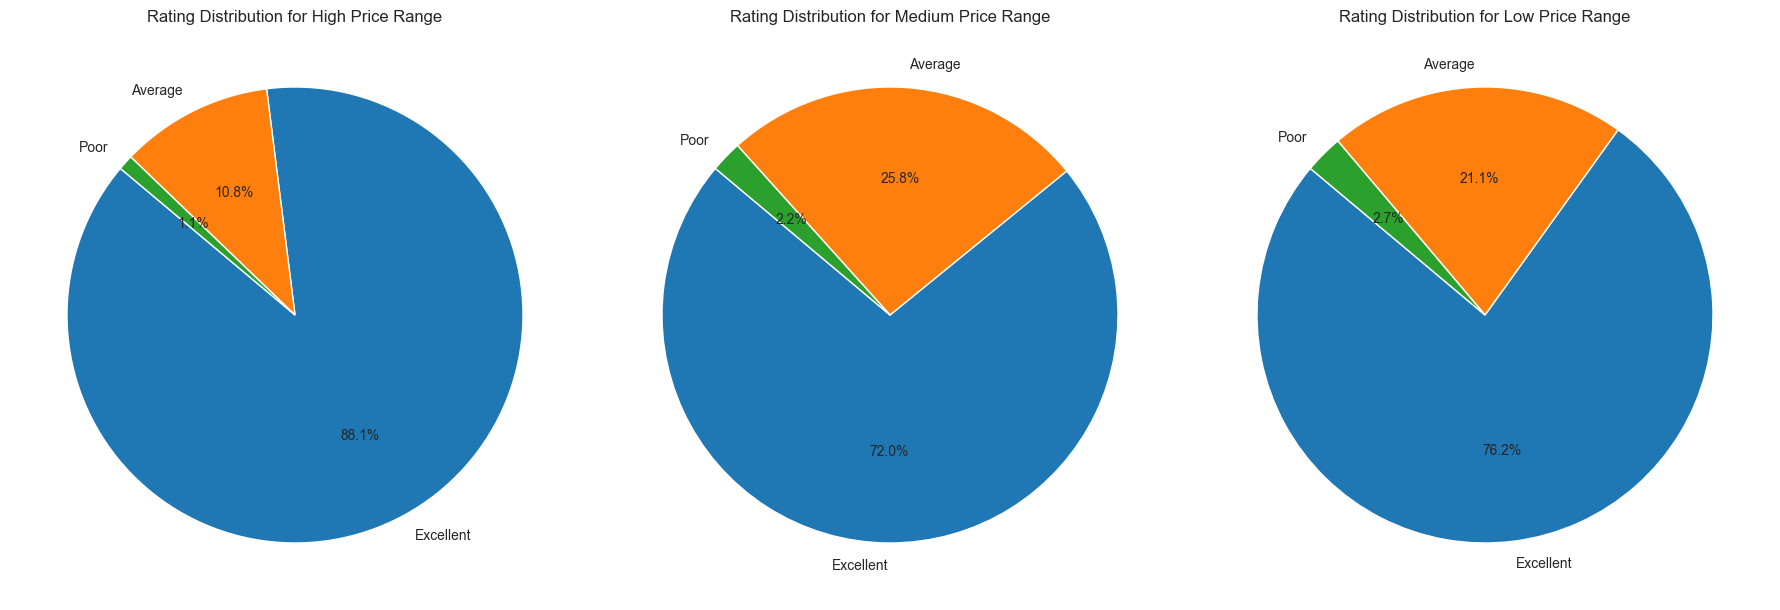

In [12]:
#subplots pie chart showing the proportion of rating categories for each price range
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
price_ranges = ['High', 'Medium', 'Low']
for ax, price in zip(axes, price_ranges):
    data = df_price[df_price['Price_Range'] == price]['Rating_Category'].value_counts()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Rating Distribution for {price.capitalize()} Price Range')
plt.tight_layout()
plt.show()


### Key Insights:
* High Price Range:

    * 88.1% of high-priced restaurants are rated as Excellent, with only 10.8% rated as Average and a 1.1% rated as Poor.

    * This indicates a strong positive correlation between higher prices and excellent ratings.

* Medium Price Range:

    * The proportion of Excellent ratings drops to 72.0%, while Average ratings increase to 25.8%, and Poor ratings to 2.2%.

    * This shows a more balanced distribution, but still skewed toward excellent ratings.

* Low Price Range:

   * Excellent ratings account for 76.2%, slightly higher than the medium price range but lower than the high range.

### Conclusion:
The data reveals a clear relationship between price range and customer ratings. High priced restaurants receive excellent ratings, supporting the price perception hypothesis. customers may associate higher prices with better quality, services and ambiance.

---

# Price Range Vs City

Analyze how the distribution of restaurant price ranges varies across different European cities. The focus is to test whether cities like Geneva and Zurich have a higher proportion of expensive restaurants compared to cities like Budapest and Krakow. This is expected to reflect differences in economic status, cost of living, and local wealth. This analysis will use two key variables Price Range and City.

<Figure size 1200x800 with 0 Axes>

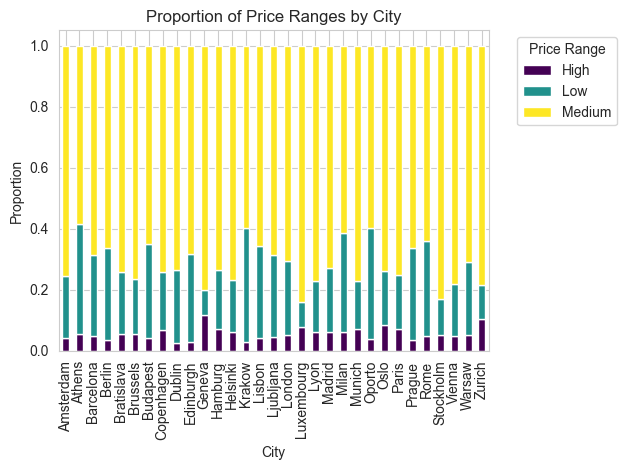

In [13]:
#stacked bar chart Shows the proportion of low, medium, and high-priced restaurants within each city
plt.figure(figsize=(12, 8))
price_city = pd.crosstab(df_price['City'], df_price['Price_Range'], normalize='index')
price_city.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportion of Price Ranges by City')
plt.xlabel('City')
plt.ylabel('Proportion')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Key Observations:

- Across most European cities, medium-priced restaurants dominate, making up the largest proportion in nearly every location.

- Low-priced restaurants represent a significant share in several cities, especially in Krakow and Oporto where their proportions visibly exceed other cities.

- High-priced restaurants consistently make up the smallest proportion across all cities, but their presence is relatively higher in wealthier cities such as Geneva and Zurich, aligning with expectations about local economic status and cost of living.

C:\Users\amron\AppData\Local\Temp\ipykernel_28692\334619498.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_price_city.index, y='High_Price_Percentage', data=high_price_city, palette='viridis')


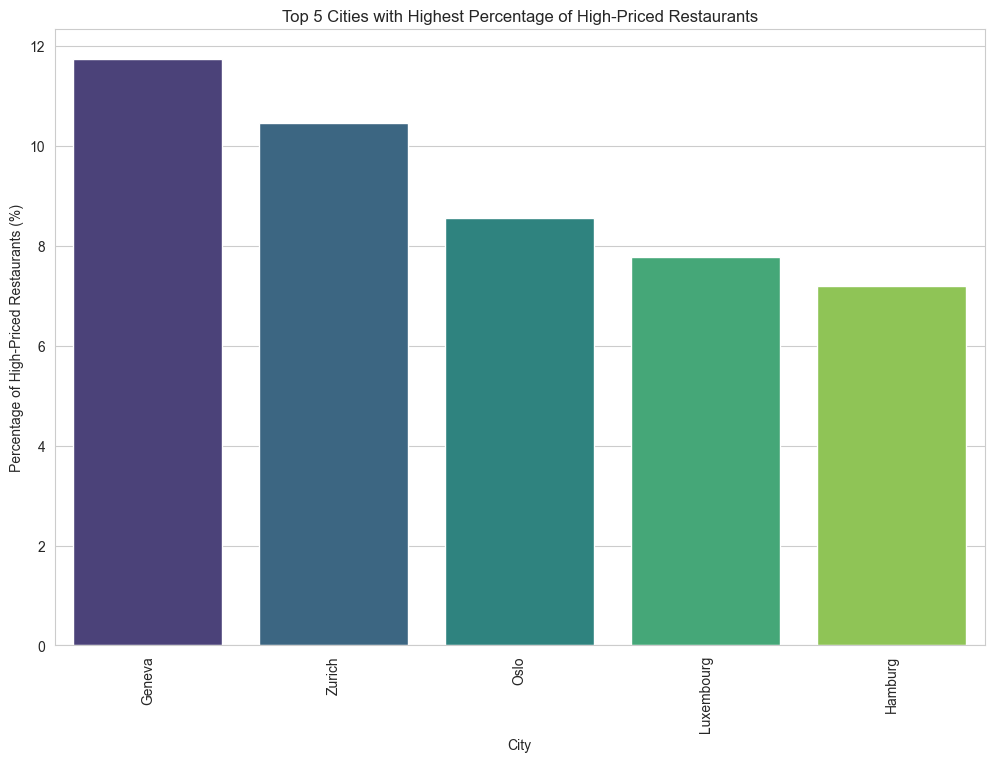

In [14]:
#the top 5 cities have high-priced restaurants 
high_price_city = df_price.groupby(['City', 'Price_Range']).size().unstack(fill_value=0)
high_price_city['Total'] = high_price_city.sum(axis=1)
high_price_city['High_Price_Percentage'] = (high_price_city['High'] / high_price_city['Total']) * 100
high_price_city = high_price_city.sort_values(by='High_Price_Percentage', ascending=False).head(5)
plt.figure(figsize=(12, 8))
sns.barplot(x=high_price_city.index, y='High_Price_Percentage', data=high_price_city, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 5 Cities with Highest Percentage of High-Priced Restaurants')
plt.ylabel('Percentage of High-Priced Restaurants (%)')
plt.xlabel('City')
plt.show()

In [15]:
#display the top 5 cities have high-priced restaurants
high_price_city

Price_Range,High,Low,Medium,Total,High_Price_Percentage
City,,,,,
Geneva,112,77,765,954,11.740042
Zurich,113,120,847,1080,10.462963
Oslo,64,132,553,749,8.544726
Luxembourg,34,36,367,437,7.780320
Hamburg,86,232,879,1197,7.184628


Key Observations:

- Geneva has the highest proportion of high-priced restaurants (11.7%), followed closely by Zurich (10.5%). These figures reflect the high cost of living and strong local economies in Switzerland.

- Oslo, Luxembourg, and Hamburg round out the top five, each with high-priced restaurant shares above 7%, indicating affluent local markets.

This distribution highlights cities where expansive dining options are more available.

C:\Users\amron\AppData\Local\Temp\ipykernel_28692\1115624613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_price_city.index, y='Low_Price_Percentage', data=low_price_city, palette='viridis')


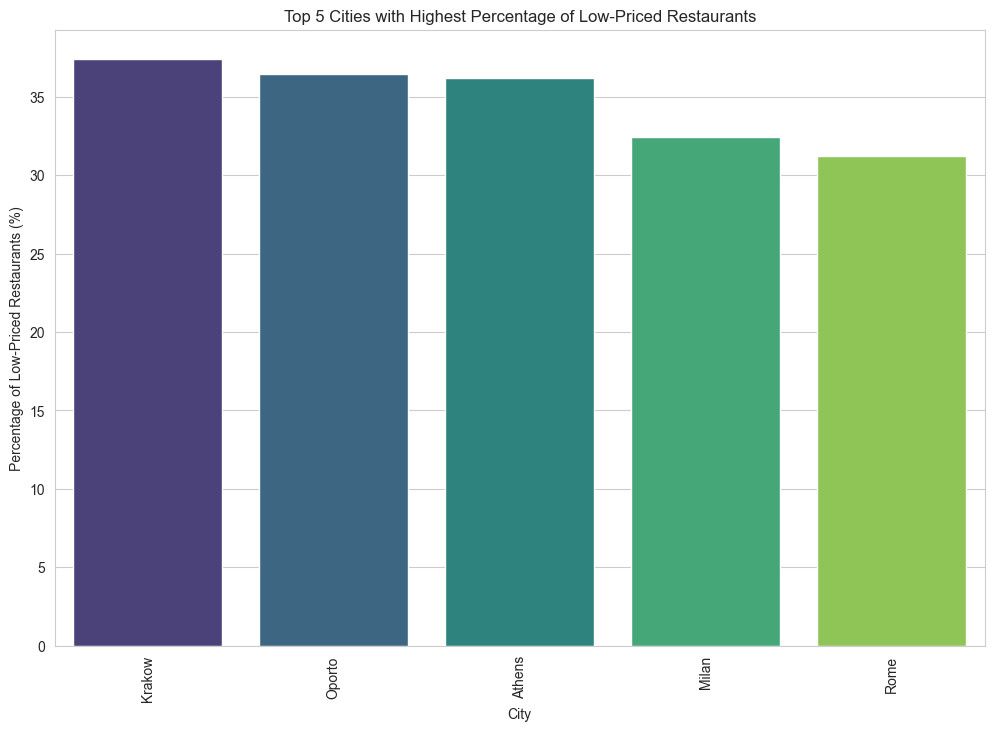

In [16]:
#top 5 cities have low-priced restaurants
low_price_city = df_price.groupby(['City', 'Price_Range']).size().unstack(fill_value=0)
low_price_city['Total'] = low_price_city.sum(axis=1)
low_price_city['Low_Price_Percentage'] = (low_price_city['Low'] / low_price_city['Total']) * 100
low_price_city = low_price_city.sort_values(by='Low_Price_Percentage', ascending=False).head(5)
plt.figure(figsize=(12, 8))
sns.barplot(x=low_price_city.index, y='Low_Price_Percentage', data=low_price_city, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 5 Cities with Highest Percentage of Low-Priced Restaurants')
plt.ylabel('Percentage of Low-Priced Restaurants (%)')
plt.xlabel('City')
plt.show()


In [17]:
#display the top 5 cities have low-priced restaurants
low_price_city

Price_Range,High,Low,Medium,Total,Low_Price_Percentage
City,,,,,
Krakow,25,309,492,826,37.409201
Oporto,39,369,605,1013,36.426456
Athens,63,422,681,1166,36.192110
Milan,236,1212,2289,3737,32.432432
Rome,223,1452,2979,4654,31.198969


Key Observations:

- Krakow leads with 37.4% of its restaurants in the low-price category, highlighting a strong emphasis on affordability.

- Oporto (36.4%) and Athens (36.2%) also show a high proportion of low-priced restaurants, reflecting accessible dining scenes for locals and tourists.

- Milan (32.4%) and Rome (31.2%)while generally known for tourism and higher costs, also show a notable share of low-priced restaurants, reflecting a mix of affordability and variety in their dining scenes.

This distribution highlights cities where budget dining options are more available.

### Key Insights:

The analysis clearly shows that price range distribution varies significantly by city, reflecting broader economic and cultural differences:

- Wealthier cities like Zurich and Geneva tend to have a higher proportion of high-priced restaurants, supporting the hypothesis that cost of living and local wealth correlate with restaurant pricing.

- In contrast, cities like Krakow, Oporto, and Athens lean heavily toward low-priced dining options, pointing to more affordable local markets and possibly catering to cost-conscious tourists or residents.

- Medium-priced restaurants dominate across all cities, suggesting they represent the “mainstream” dining segment throughout Europe.

- Milan and Rome, while major cities with diverse markets, show a balance between affordability and upscale options.

### Conclusion:

Overall, these patterns support Price Range vs. City Hypothesis, indicating that economic factors at the city level influence the price range distribution of restaurants. Cities with higher living costs host more expensive restaurants, while more affordable cities offer a larger share of budget-friendly options.  

---

# Cuisine Counts Vs Rating


Analyze whether restaurants offering a greater number of cuisines tend to receive higher customer ratings and possibly more reviews due to more diverse menus. This analysis will use two key variables: Cuisine Counts and Rating.

In [18]:
#copy the dataframe to avoid any changes to the original dataframe
df_cuisine_counts = df.copy()

In [19]:
#check for unique values in Cuisine_Counts column to understand the range of cuisine counts
df_cuisine_counts['Cuisine_Counts'].unique()

array([ 3,  4,  6,  7,  5,  2,  9,  8, 21,  1, 10, 13, 12, 11, 15],
      dtype=int64)

In [20]:
#check for amount values for each unique values in Cuisine_Counts column
df_cuisine_counts['Cuisine_Counts'].value_counts()


Cuisine_Counts
2     14113
3     14006
4     13092
1     12891
5     10195
6      5939
7      2841
8       866
9       207
10       52
11       14
12        2
21        1
13        1
15        1
Name: count, dtype: int64

Grouping the cuisine counts into meaningful categories is necessary for reliable analysis and avoid outlier in a very small group that can affect test results. The categories will be:

- Single Cuisine (1)	
- Small Variety (2–3)	
- Medium Variety (4–6)
- Large Variety	(7–10)	
- Very Large Variety (11+)


In [ ]:
#group the Cuisine_Counts into three categories:Small Variety (2–3), Medium Variety (4–6), Large Variety (7–10), Very Large Variety (11+)
def categorize_cuisine(count):
    if count == 1:
        return 'Single Cuisine'
    elif 2 <= count <= 3:
        return 'Small Variety'
    elif 4 <= count <= 6:
        return 'Medium Variety'
    elif 7 <= count <= 10:
        return 'Large Variety'
    else:
        return 'Very Large Variety'
df_cuisine_counts['Cuisine_Category'] = df_cuisine_counts['Cuisine_Counts'].apply(categorize_cuisine)
#display the first row to confirm changes
df_cuisine_counts.head(1)


,Name,City,Cuisine,Ranking,Rating,Price_Range,Number_of_Reviews,Cuisine_Counts,Country_Name,Cuisine_Category
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136,3,Netherlands,Small Variety


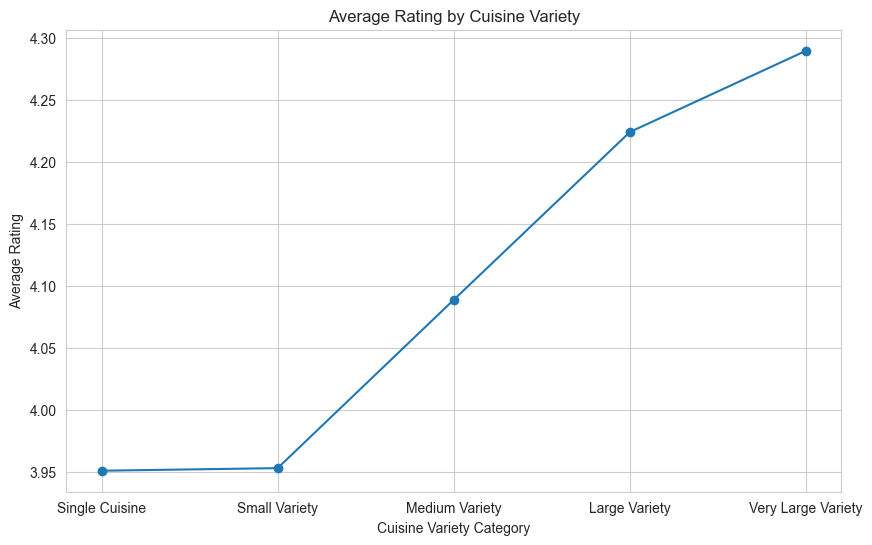

In [ ]:
#line chart showing the rating average for each cuisine count category
cuisine_rating = df_cuisine_counts.groupby('Cuisine_Category')['Rating'].mean().reindex(['Single Cuisine', 'Small Variety', 'Medium Variety', 'Large Variety', 'Very Large Variety'])
plt.figure(figsize=(10, 6))
plt.plot(cuisine_rating.index, cuisine_rating.values, marker='o')
plt.title('Average Rating by Cuisine Variety')
plt.xlabel('Cuisine Variety Category')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()



### Key Insights:
- Single Cuisine & Small Variety (1–3 cuisines)

  - Average ratings hover nearly (3.95), with almost no difference between “Single” and “Small Variety.”

  - This suggests that specialized or narrowly focused restaurants don’t necessarily receive higher ratings by default, they may appeal to niche tastes but not to a broad base.

- Medium Variety (4–6 cuisines)

  - There’s a noticeable jump to nearly (4.09) average rating, indicating that offering a broader but manageable variety seems to positively influence customer satisfaction.

- Large Variety (7–10 cuisines)

  - The rating rises further to nearly (4.22), showing that restaurants with wide menus are perceived more favorably.

  - This aligns with reasoning: more variety = more flexibility = broader appeal.

- Very Large Variety (11+ cuisines)

  - Interestingly, the average rating continues to rise to nearly (4.29), not dropping as one might expect from “buffet” style places.

  - This might indicate that many of these high-variety restaurants are well-rated international buffets, large venues, or tourist-focused places that successfully deliver variety.

  ### Conclusion:
  There is a clear positive relationship between the number of cuisines offered and the average customer rating which supports the hypothesis that restaurants offering a greater number of cuisines tend to receive higher ratings.  Restaurants with larger cuisine variety tend to receive higher ratings, with “Very Large Variety” restaurants achieving the highest average rating nearly (4.29). This pattern likely reflects their broader appeal to diverse customer groups and greater flexibility.

---